---
layout: post
title: "Loss function이란 무엇일까?"
author: "Chanjun Kim"
categories: Data분석
tags: [Data, Lossfunction, 손실함수, 목적함수, 비용함수, 머신러닝, 딥러닝, ML, DeepLearning]
image: 07_loss_function.gif
---

## **학습목적**
이 포스팅에선 머신러닝/딥러닝에 쓰이는 Loss function에 대해서 알아보겠습니다.<br>

#### **1. Objective / Cost / Loss function**
- 만들고자 하는 머신러닝/딥러닝 모델을 만들 때 대체로 Loss function이란 말을 쓰지만 조금의 차이가 있을 수 있으니 위 세개의 말이 어떻게 다른지 알아보겠습니다.

**1. Objective Function(목적 함수)**
- 목적함수는 셋 중에 가장 큰 범위로 말 그대로 모델을 만드는 목적을 말합니다. 보통 Loss function은 오차를 최소화하기 위한 것이지만 MLE 같이 최대화하는 경우는 Loss function에는 포함되지 않습니다.

**2. Loss Function(손실 함수)**
- 손실 함수는 우리가 가지고 있는 예측된 값과 실제 Y값의 차이를 계산하는 함수입니다.

**3. Cost Function(목적 함수)**
- 목적함수는 전체 데이터의 손실의 합을 의미합니다.

### **모델 종류에 따른 Cost function의 종류**
- 분류 모델인지 회귀 모델인지에 따라서 각각 다른 Cost/Loss function을 사용하고 그 안에서도 다양하게 분류되어있습니다.
    - 이 중에서 대표적인 함수 몇개에 대해서 알아보도록 하겠습니다.

![Oops](https://miro.medium.com/max/972/1*3MsFzl7zRZE3TihIC9JmaQ.png)

- *사실 Loss function과 Cost function이 혼용되어 사용되고 있는 것 같습니다.*
    
> 출처 : [https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0](https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0)

---

#### 1. MSE - Mean Squared Error(평균 제곱 오차)

![Oops](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FraTNF%2FbtqILMEZ4dR%2FGVFcXNBaX3KXuGWJ2MHsTk%2Fimg.png)

- 실제값과 예측값 오차(Error)의 제곱값의 평균입니다. 
    - 즉 오차의 제곱이 Loss function, 그 평균이 Cost function이 됩니다.(이 설명은 아래서부터는 생략하겠습니다.)
    - Gradient Descent를 할 때 미분값이 활용되므로 가장 일반적인 비용함수로 활용된다고 합니다.
    - 사용되지만 Error에 제곱을 하기 때문에 이상치에 민감하게 되는 특성을 가지고 있습니다.
    
---
    


#### 2. MAE - Mean Absolute Error(평균 절대 오차)

![Oops](https://blog.kakaocdn.net/dn/p0MT3/btqIPQ7GhmP/yk484qPJ3MK90RG9gnFOR1/img.png)

- 실제값과 예측값 오차(Error)의 절대값의 평균입니다.
    - 실제 값에 절대값만 취했기 때문에 오차에 민감하지 않습니다.
    - 미분을 하면 항상 일정하기 때문에 수렴이 안될 수도 있습니다.

##### ※ MAE와 MSE 의 손실 그래프
![Oops](https://miro.medium.com/max/700/1*JTC4ReFwSeAt3kvTLq1YoA.png)

- 첫번째 MAE의 손실함수는 오차가 작아지더라도 똑같은 기울기를 갖기 때문에 수렴하지 못할 가능성이 있습니다.

> 출처 : https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0

In [1]:
import os
import sys
import warnings

import random

import numpy as np
import pandas as pd

from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error

from plotnine import * 

In [2]:
%matplotlib inline
warnings.filterwarnings(action='ignore')

---

#### **Sample Data : 700, noise : 3**

- sklearn의 make_regression을 노이즈가 크고 작은 regression 데이터를 만든 후 GradientBoostRegression 에서 loss를 lad(Least Absolute Deviations), ls(Least Square) 를 각각의 Cost function으로 사용하여 비교를 해보겠습니다.

In [3]:
reg_data = make_regression(n_samples=700, n_features=1, coef = True, bias=0, noise=3, random_state=0)
W = reg_data[2]
reg_data = pd.DataFrame({"x" : np.reshape(reg_data[0], (1, -1))[0], "y" : np.reshape(reg_data[1], (1, -1))[0]})

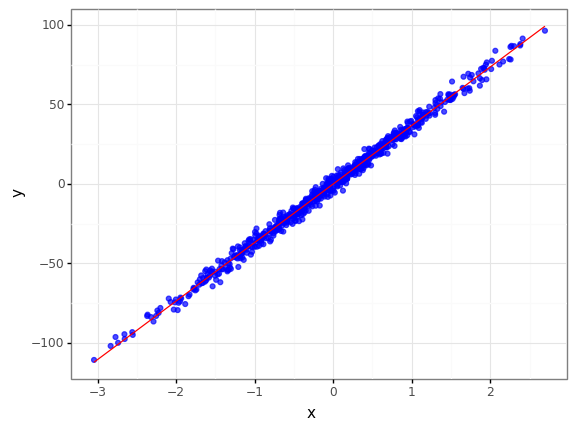

<ggplot: (8780434767418)>

In [4]:
(
    ggplot() +
    geom_point(data = reg_data, mapping = aes(x = "x", y = "y"), alpha = 0.7, color = "blue") +
    geom_line(data = reg_data.assign(Yhat = lambda x : W * x["x"]), mapping = aes(x = "x", y = "Yhat"), color = "red") +
    theme_bw()
)

![Oops](../assets/img/2021-07-05-LossFunction/2021-07-05-LossFunction_11_0.png)

In [5]:
train_noise3, val_noise3 = train_test_split(reg_data)

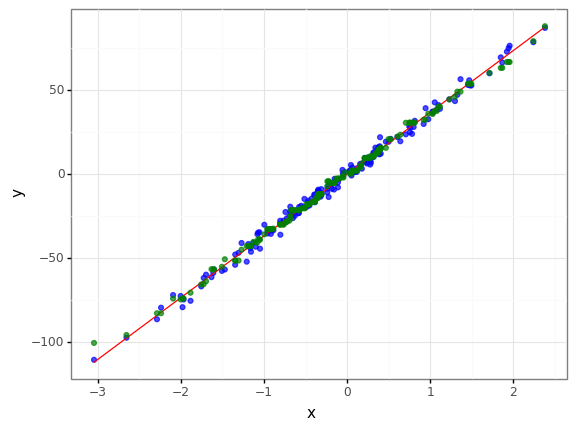

<ggplot: (8780435123953)>

In [6]:
gb_mae = GradientBoostingRegressor(loss='lad')
gb_mae.fit(train_noise3[["x"]], train_noise3["y"])
val_noise3["predict_mae"] = gb_mae.predict(val_noise3[["x"]])

(
    ggplot() +
    geom_point(data = val_noise3, mapping = aes(x = "x", y = "y"), alpha = 0.7, color = "blue") +
    geom_line(data = val_noise3.assign(Yhat = lambda x : W * x["x"]), mapping = aes(x = "x", y = "Yhat"), color = "red") +
    geom_point(data = val_noise3, mapping = aes(x = "x", y = "predict_mae"), alpha = 0.7, color = "green") +
    theme_bw()
)

![Oops](../assets/img/2021-07-05-LossFunction/2021-07-05-LossFunction_14_0.png)

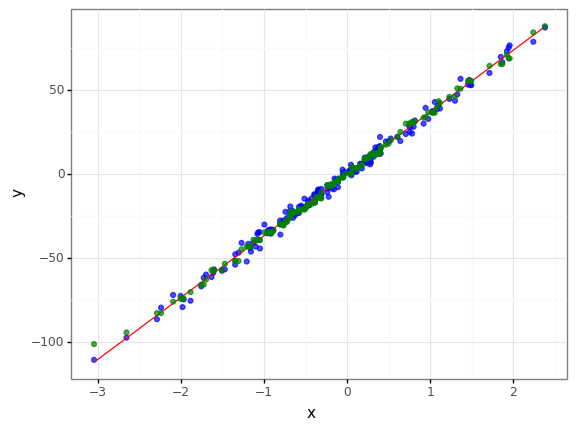

<ggplot: (8780435373918)>

In [7]:
gb_mse = GradientBoostingRegressor(loss='ls')
gb_mse.fit(train_noise3[["x"]], train_noise3["y"])
val_noise3["predict_mse"] = gb_mse.predict(val_noise3[["x"]])

(
    ggplot() +
    geom_point(data = val_noise3, mapping = aes(x = "x", y = "y"), alpha = 0.7, color = "blue") +
    geom_line(data = val_noise3.assign(Yhat = lambda x : W * x["x"]), mapping = aes(x = "x", y = "Yhat"), color = "red") +
    geom_point(data = val_noise3, mapping = aes(x = "x", y = "predict_mse"), alpha = 0.7, color = "green") +
    theme_bw()
)

![Oops](../assets/img/2021-07-05-LossFunction/2021-07-05-LossFunction_16_0.png)

In [8]:
r2_mse = r2_score(val_noise3["y"], val_noise3["predict_mse"])
r2_mae = r2_score(val_noise3["y"], val_noise3["predict_mae"])
print(f"loss function = mse , r2 = {r2_mse} \nloss function = mae , r2 = {r2_mae} \n")
print("mse loss function is better") if r2_mse > r2_mae else print("mae loss function is better")

loss function = mse , r2 = 0.9918358038512971 
loss function = mae , r2 = 0.9915088210446611 

mse loss function is better


- 거의 차이가 나지 않으나 mse가 근소하게 더 좋게 나타났습니다.
    - 사실 데이터가 너무 좋으면 Cost function이 무슨 의미가....

---

#### **Sample Data : 700, noise : 30 -> 노이즈 량을 추가** 

In [9]:
reg_data = make_regression(n_samples=700, n_features=1, coef = True, bias=0, noise=30, random_state=0)
W = reg_data[2]
reg_data = pd.DataFrame({"x" : np.reshape(reg_data[0], (1, -1))[0], "y" : np.reshape(reg_data[1], (1, -1))[0]})

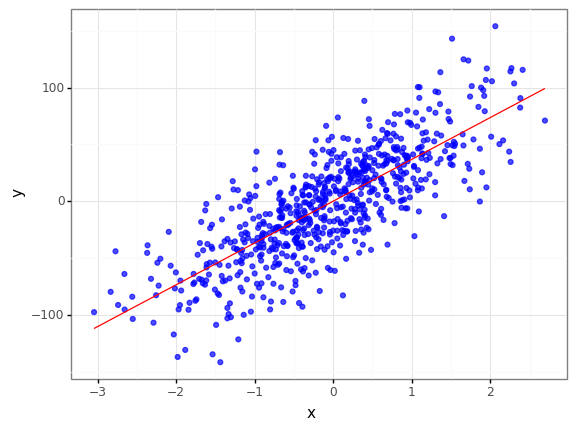

<ggplot: (8780435392847)>

In [10]:
(
    ggplot() +
    geom_point(data = reg_data, mapping = aes(x = "x", y = "y"), alpha = 0.7, color = "blue") +
    geom_line(data = reg_data.assign(Yhat = lambda x : W * x["x"]), mapping = aes(x = "x", y = "Yhat"), color = "red") +
    theme_bw()
)

![Oops](../assets/img/2021-07-05-LossFunction/2021-07-05-LossFunction_19_0.png)

In [11]:
train_noise30, val_noise30 = train_test_split(reg_data)

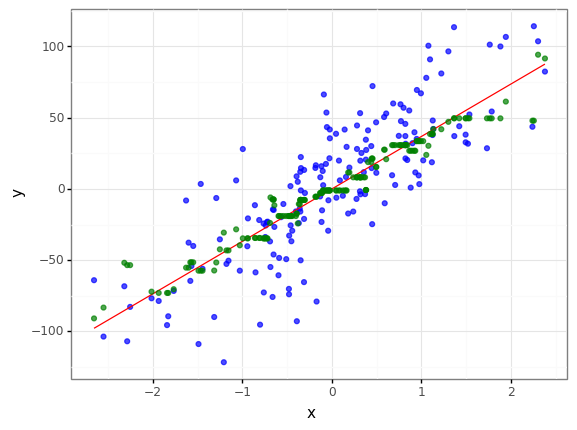

<ggplot: (8780435595828)>

In [12]:
mod_mae = GradientBoostingRegressor(loss='lad')
mod_mae.fit(train_noise30[["x"]], train_noise30["y"])
val_noise30["predict_mae"] = mod_mae.predict(val_noise30[["x"]])

(
    ggplot() +
    geom_point(data = val_noise30, mapping = aes(x = "x", y = "y"), alpha = 0.7, color = "blue") +
    geom_line(data = val_noise30.assign(Yhat = lambda x : W * x["x"]), mapping = aes(x = "x", y = "Yhat"), color = "red") +
    geom_point(data = val_noise30, mapping = aes(x = "x", y = "predict_mae"), alpha = 0.7, color = "green") +
    theme_bw()
)

![Oops](../assets/img/2021-07-05-LossFunction/2021-07-05-LossFunction_25_0.png)

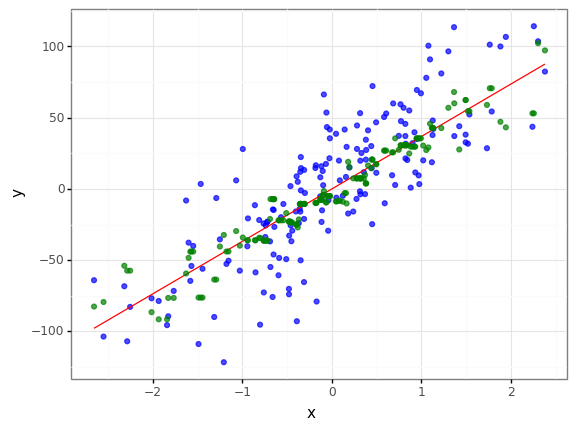

<ggplot: (8780435596535)>

In [13]:
mod_mse = GradientBoostingRegressor(loss='ls')
mod_mse.fit(train_noise30[["x"]], train_noise30["y"])
val_noise30["predict_mse"] = mod_mse.predict(val_noise30[["x"]])

(
    ggplot() +
    geom_point(data = val_noise30, mapping = aes(x = "x", y = "y"), alpha = 0.7, color = "blue") +
    geom_line(data = val_noise30.assign(Yhat = lambda x : W * x["x"]), mapping = aes(x = "x", y = "Yhat"), color = "red") +
    geom_point(data = val_noise30, mapping = aes(x = "x", y = "predict_mse"), alpha = 0.7, color = "green") +
    theme_bw()
)

![Oops](../assets/img/2021-07-05-LossFunction/2021-07-05-LossFunction_27_0.png)

In [14]:
r2_mse = r2_score(val_noise30["y"], val_noise30["predict_mse"])
r2_mae = r2_score(val_noise30["y"], val_noise30["predict_mae"])
print(f"loss function = mse , r2 = {r2_mse} \nloss function = mae , r2 = {r2_mae} \n")
print("mse loss function is better") if r2_mse > r2_mae else print("mae loss function is better")

loss function = mse , r2 = 0.621454977530706 
loss function = mae , r2 = 0.6287389318213169 

mae loss function is better


- 두개의 성능이 둘다 확연히 떨어졌지만, mae를 비용함수로 사용하는게 평가지표(R2)에서 더 좋다는 것을 확인할 수 있습니다.
    - 하지만 그래프를 보고 두개의 특징을 표현하기에는 애매해 보입니다.

---

#### **Sample Data : 700, noise : 3 -> 랜덤 노이즈 추가**

In [15]:
reg_data = make_regression(n_samples=700, n_features=1, coef = True, bias=0, noise=3, random_state=0)
W = reg_data[2]
reg_data = pd.DataFrame({"x" : np.reshape(reg_data[0], (1, -1))[0], "y" : np.reshape(reg_data[1], (1, -1))[0]})

In [16]:
reg_data.y.describe()

count    700.000000
mean      -2.452193
std       37.111026
min     -110.632613
25%      -26.714069
50%       -2.736849
75%       22.932101
max       96.369512
Name: y, dtype: float64

In [17]:
reg_data["outlier"] = 0
reg_data.loc[[random.randint(1, 700) for i in range(70)], "outlier"] = [-1 * random.random() * 70 if random.random() > 0.5 else random.random() * 50 for i in range(70)]
reg_data["y"] = reg_data["y"] + reg_data["outlier"]

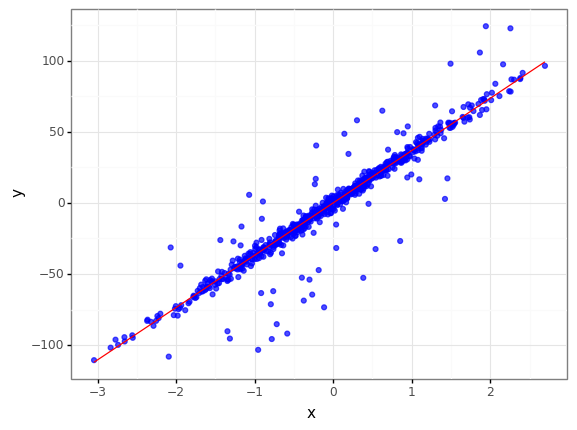

<ggplot: (8780435639652)>

In [18]:
(
    ggplot() +
    geom_point(data = reg_data, mapping = aes(x = "x", y = "y"), alpha = 0.7, color = "blue") +
    geom_line(data = reg_data.assign(Yhat = lambda x : W * x["x"]), mapping = aes(x = "x", y = "Yhat"), color = "red") +
    theme_bw()
)

![Oops](../assets/img/2021-07-05-LossFunction/2021-07-05-LossFunction_29_0.png)

In [19]:
train_noise_add, val_noise_add = train_test_split(reg_data)

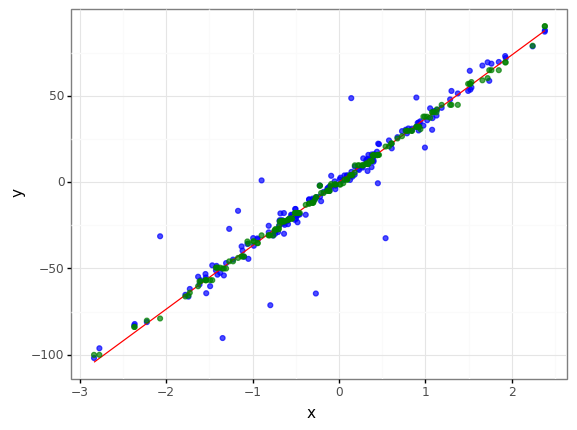

<ggplot: (8780435748928)>

In [20]:
gb_mae = GradientBoostingRegressor(loss='lad')
gb_mae.fit(train_noise_add[["x"]], train_noise_add["y"])
val_noise_add["predict_mae"] = gb_mae.predict(val_noise_add[["x"]])

(
    ggplot() +
    geom_point(data = val_noise_add, mapping = aes(x = "x", y = "y"), alpha = 0.7, color = "blue") +
    geom_line(data = val_noise_add.assign(Yhat = lambda x : W * x["x"]), mapping = aes(x = "x", y = "Yhat"), color = "red") +
    geom_point(data = val_noise_add, mapping = aes(x = "x", y = "predict_mae"), alpha = 0.7, color = "green") +
    theme_bw()
)

![Oops](../assets/img/2021-07-05-LossFunction/2021-07-05-LossFunction_38_0.png)

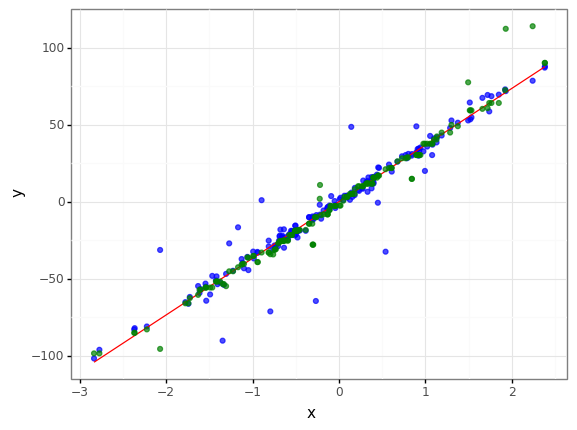

<ggplot: (8780435116644)>

In [21]:
gb_mse = GradientBoostingRegressor(loss='ls')
gb_mse.fit(train_noise_add[["x"]], train_noise_add["y"])
val_noise_add["predict_mse"] = gb_mse.predict(val_noise_add[["x"]])

(
    ggplot() +
    geom_point(data = val_noise_add, mapping = aes(x = "x", y = "y"), alpha = 0.7, color = "blue") +
    geom_line(data = val_noise_add.assign(Yhat = lambda x : W * x["x"]), mapping = aes(x = "x", y = "Yhat"), color = "red") +
    geom_point(data = val_noise_add, mapping = aes(x = "x", y = "predict_mse"), alpha = 0.7, color = "green") +
    theme_bw()
)

![Oops](../assets/img/2021-07-05-LossFunction/2021-07-05-LossFunction_39_0.png)

In [22]:
r2_mse = r2_score(val_noise_add["y"], val_noise_add["predict_mse"])
r2_mae = r2_score(val_noise_add["y"], val_noise_add["predict_mae"])
print(f"loss function = mse , r2 = {r2_mse} \nloss function = mae , r2 = {r2_mae} \n")
print("mse loss function is better") if r2_mse > r2_mae else print("mae loss function is better")

loss function = mse , r2 = 0.9034459237257022 
loss function = mae , r2 = 0.9289790449993298 

mae loss function is better


- 랜덤하게 노이즈를 추가한 결과 역시 mae를 사용한 모델이 성능이 더 좋게 나왔습니다.
- 하지만 그래프를 보면 mae를 사용한 결과 거의 선에 fitting되어 오버피팅처럼 보이는 경향이 있습니다.
- mse를 사용한 모델의 경우 이상치가 추가된 데이터를 조금은 따라가려는 듯한 모습을 보입니다.

---

#### **중간 결론**
- 시계열 데이터 - ARIMA를 설명할 때의 결론도 그랬지만, 성능 지표를 무조건 맞추기 보다는 직면한 문제 맞도록 모델, cost function을 정의하는 것이 중요하다고 생각된다.
- 중간에 멘토링을 할 때도 잠깐 느꼈지만, 모델(혹은 기술)에 대한 무조건적인 지향과 흔히 대회들에서 요구하는 평가지표로 높은 순서를 가져가는 것보다는 생각했던 기획, 목표에 맞는 모델링을 할 수 있는 인사이트와 이해력이 앞으로 필요할 것 같습니다.

---

#### 3. Huber

![Oops](https://miro.medium.com/max/1050/1*0eoiZGyddDqltzzjoyfRzA.png)
<br>

- 임의의 값 델타(δ)를 정하여 -δ < e < δ 이면 mse를 사용하고 아니면 mae를 사용합니다.
    - 이렇게 특정값 이상되면 mae를 사용하고, 작은 값에 대해서는 학습이 잘되는 mse를 hybrid로 활용하게 됩니다.
    - 1/2를 곱해주는 것은 두 함수의 그래프가 매끄럽게 이어지도록 만들어주는 역할을 합니다.
        - 두개의 장점을 골라쓰는 것이므로 따로 예시를 만들지는 않겠습니다.

---

#### 4. Quantile Loss - 분위수 손실

![Oops](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbIkrTs%2Fbtq0PclotMK%2FHuEveX1vTX5SLTiXSKn3FK%2Fimg.png)
<br>

- 분위수를 하이퍼파라미터로 X값이 해당 median보다 작은 X에 대하여 가중치를 주는 방식입니다.
    - 수식이 조금 헷갈릴 수 있으니 예시를 보면 조금 더 자연스럽게 이해가 될 것입니다.

<br>
ex) q = 0.25 일 때의 분위수 손실 :
<br>

![Oops](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FlOZxd%2Fbtq0MUlsDw5%2FKvxmEJgp9Qnr34N5dcvOgk%2Fimg.png)

<br>

- q = 0.25로 주었을 때 보게 된다면 X < median 일 경우 0.75라는 훨씬 큰 가중치를 주게 됩니다.
- 또 생각해보면 q = 0.5일 때는 mae랑 똑같다는 것을 판단 할 수 있습니다. 
- 다르게 이해한다면 q분위수를 median으로 바꿔준다고 생각할 수 있습니다.

In [23]:
ex_ = [i for i in range(1, 10)]
np.median(ex_)

5.0

In [24]:
np.round(np.quantile(ex_, 0.95)) 

9.0

In [25]:
ex__ = ex_ + [np.round(np.quantile(ex_, 0.95)) for _ in range(1, 10)]
np.median(ex__)

9.0

- 위에서 보는 것과 비슷하다고 이해하시면 될 것 같습니다.
    - 그렇기에 일종의 Wieghted MAE라고 불리기도 합니다. 
    - 제가 생각한 이 모델의 장점은 분산의 변화나 다중 웨이트를 가졌을 때 범위를 정할 수 있을 것 같다는 생각이 들었습니다.
    - 예시)
        1. 비슷한 Weight를 가졌으나 bias를 다르게 가진 경우
        2. 비슷한 bias를 가졌으나 Weight를 다르게 가진 경우
   
> 출처 : https://cnp-0717.tistory.com/m/22  <br>
> 출처 : https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0  <br>
> 출처 : http://ds.sumeun.org/?p=2173  <br>

- 예시1) 의 경우 데이터를 생성해보겠습니다.

In [26]:
Ws = []
bias = []
reg_data = pd.DataFrame()
for i in range(5) :
    bias_ = (i+5) ** 3 
    reg_data_ = make_regression(n_samples=100, n_features=1, coef = True, bias= bias_, noise=40, random_state = 0)
    W_ = reg_data_[2]
    reg_data_ = pd.DataFrame({"x" : np.reshape(reg_data_[0], (1, -1))[0], "y" : np.reshape(reg_data_[1], (1, -1))[0]})
    reg_data_["i"] = i
    reg_data_["W"] = W_
    reg_data_["bias"] = bias_
    Ws += W_
    bias += [bias_]
    reg_data = pd.concat([reg_data, reg_data_])

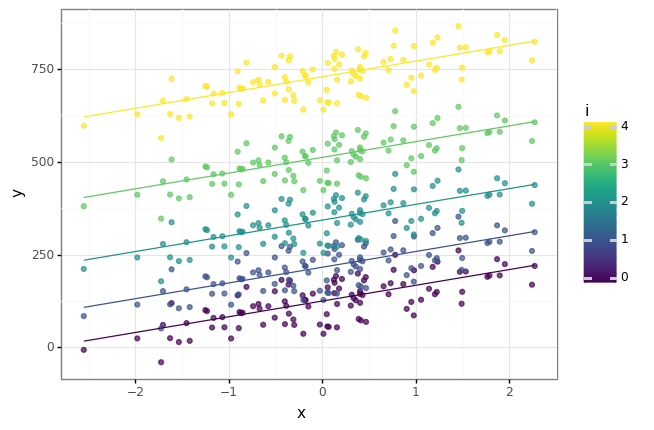

<ggplot: (8780435121905)>

In [27]:
(
    ggplot() +
    geom_point(data = reg_data, mapping = aes(x = "x", y = "y", color = "i"), alpha = 0.7, ) +
    geom_line(data = reg_data.assign(Yhat = lambda x : x["W"] * x["x"] + x["bias"]), mapping = aes(x = "x", y = "Yhat", group = "i", color = "i")) +
    theme_bw()
)

![Oops](../assets/img/2021-07-05-LossFunction/2021-07-05-LossFunction_52_0.png)

In [28]:
train_quant, val_quant = train_test_split(reg_data)

In [29]:
result = {}
result_ = {}
result__ = {}
for alpha in [(i+1) / 10 for i in range(9)] :
    gb_quant = GradientBoostingRegressor(loss='quantile', alpha = alpha)
    gb_quant.fit(train_quant[["x"]], train_quant["y"])
    result[f"q{alpha}"] = gb_quant.predict(val_quant[["x"]])
    result_[f"q{alpha}"] = val_quant["y"]
    result__[f"q{alpha}"] = val_quant["x"]
result = pd.DataFrame(result)
result_ = pd.DataFrame(result_)
result__ = pd.DataFrame(result__)

In [30]:
result = pd.concat([pd.melt(result).add_prefix("predict_"), pd.melt(result_).add_prefix("Y_"), pd.melt(result__).add_prefix("X_")], axis = 1)

In [31]:
result["q"] = result["predict_variable"].str.replace("q", "").astype(float)

- 한 데이터 상에 여러 bias를 가질 경우 아래와 같이 각각의 q를 통하여 well-fitting된 결과를 얻을 수 있습니다.
    - 또한 파란색 선이 위에서 2번째에서 4번째 선 사이에 초록색 점들이 있는 것으로 보아 이상치 탐지 같은 곳에 쓰일 수 있을 것 같습니다.
    - ex) 어떤 회사에서 직급제로 확실한 연봉이 뛴다고 했을 때 본인들의 연봉을 확인할 수 있는 모델링이 필요할 수 있습니다.(x축이 시간(or 근무연수))

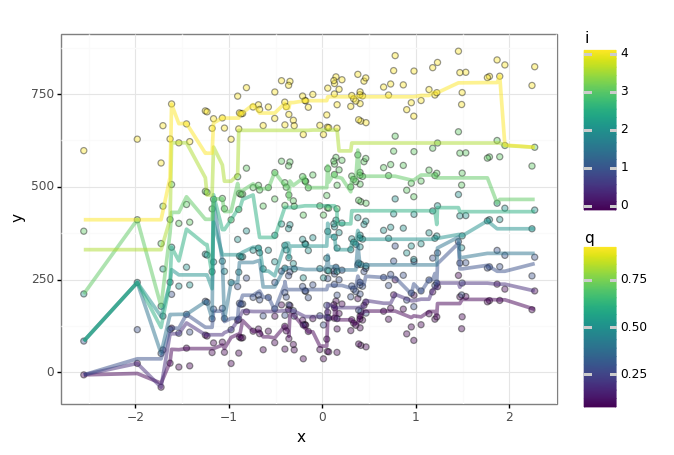

<ggplot: (8780436184420)>

In [32]:
(
    ggplot() +
    geom_point(data = reg_data, mapping = aes(x = "x", y = "y", fill = "i"), alpha = 0.4, size = 2) +
    geom_line(data = result, mapping = aes(x = "X_value", y = "predict_value", color = "q", group = "predict_variable"), size = 1.5, alpha = 0.5) +
    theme_bw()
)

![Oops](../assets/img/2021-07-05-LossFunction/2021-07-05-LossFunction_59_0.png)

In [33]:
reg_data = make_regression(n_samples=700, n_features=1, coef = True, bias=0, noise=0, random_state=0)
W = reg_data[2]
reg_data = pd.DataFrame({"x" : np.reshape(reg_data[0], (1, -1))[0], "y" : np.reshape(reg_data[1], (1, -1))[0]})

In [34]:
reg_data = reg_data[reg_data.x > 0]

In [35]:
reg_data["y"] = [x[1] + (( -1 if random.random() > 0.5 else 1) * (20 * x[0] * x[0] * random.random())) for x in reg_data.values]

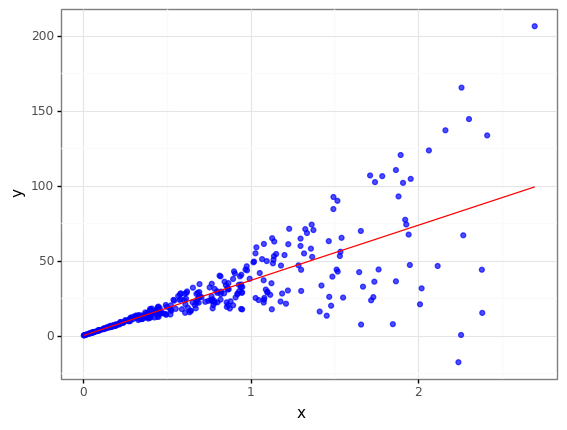

<ggplot: (8780436361710)>

In [36]:
(
    ggplot() +
    geom_point(data = reg_data, mapping = aes(x = "x", y = "y"), alpha = 0.7, color = "blue") +
    geom_line(data = reg_data.assign(Yhat = lambda x : W * x["x"]), mapping = aes(x = "x", y = "Yhat"), color = "red") +
    theme_bw()
)

![Oops](../assets/img/2021-07-05-LossFunction/2021-07-05-LossFunction_63_0.png)

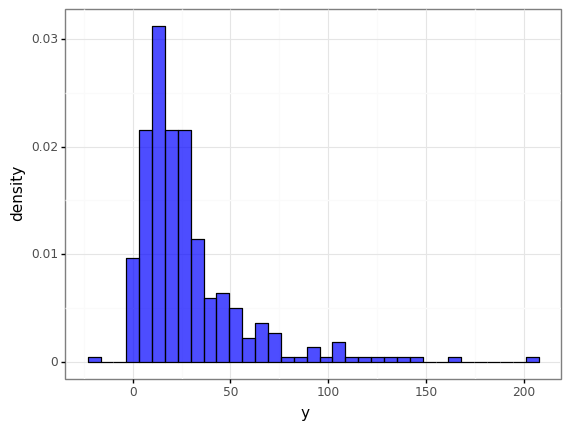

<ggplot: (8780436607383)>

In [37]:
(
    ggplot(data = reg_data, mapping = aes(x = "y", y = "..density..")) +
    geom_histogram(alpha = 0.7, fill = "blue", color = "black")  +
    theme_bw()
)

![Oops](../assets/img/2021-07-05-LossFunction/2021-07-05-LossFunction_66_0.png)

In [38]:
train_quant, val_quant = train_test_split(reg_data)

In [39]:
result = {}
result_ = {}
result__ = {}
for alpha in [(i+1) / 10 for i in range(9)] :
    gb_quant = GradientBoostingRegressor(loss='quantile', alpha = alpha)
    gb_quant.fit(train_quant[["x"]], train_quant["y"])
    result[f"q{alpha}"] = gb_quant.predict(val_quant[["x"]])
    result_[f"q{alpha}"] = val_quant["y"]
    result__[f"q{alpha}"] = val_quant["x"]
result = pd.DataFrame(result)
result_ = pd.DataFrame(result_)
result__ = pd.DataFrame(result__)

In [40]:
result = pd.concat([pd.melt(result).add_prefix("predict_"), pd.melt(result_).add_prefix("Y_"), pd.melt(result__).add_prefix("X_")], axis = 1)

In [41]:
result["q"] = result["predict_variable"].str.replace("q", "").astype(float)

- 한 데이터 상에 여러 기울기를 가질 경우 아래와 같이 각각의 q를 통하여 얻고자 하는 값의 범위를 알 수 있습니다.
    - 기존의 선형 함수가 가지고 있는 기울기 대신 데이터들이 어느 정도 분위수 안에서 피팅되는지 알 수 있을 것입니다.
    - ~~현실 데이터에서 저런 histogram이 많이 생겼던 것 같은데 우연히도 여기서 또 보게되다니...~~
<br>

> 편의 상 x의 제곱에 상수를 곱하여 오차를 만들어 분산이 선형으로 일어나진 않아 모델이 꼭 잘 피팅되진 않은 것 같습니다.

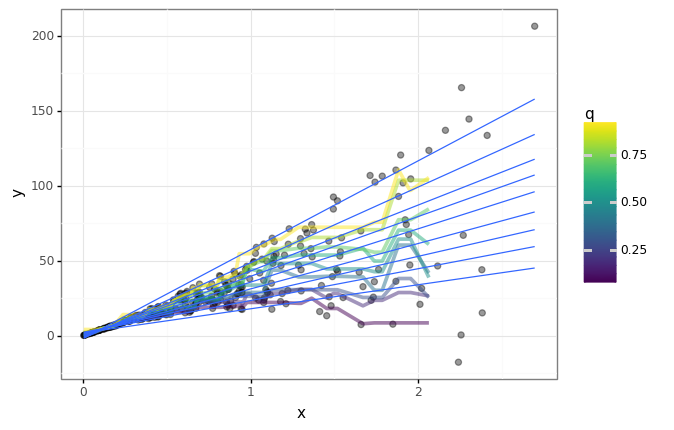

<ggplot: (8780436172677)>

In [42]:
(
    ggplot() +
    geom_point(data = reg_data, mapping = aes(x = "x", y = "y"), alpha = 0.4, size = 2) +
    geom_line(data = result, mapping = aes(x = "X_value", y = "predict_value", color = "q", group = "predict_variable"), size = 1.5, alpha = 0.5) +
    stat_quantile(data = reg_data,  mapping = aes(x = "x", y = "y"), quantiles = set([(i+1) / 10 for i in range(9)])) +
    theme_bw()
)

![Oops](../assets/img/2021-07-05-LossFunction/2021-07-05-LossFunction_72_0.png)

---

#### 5.Metric - 평가지표

---

##### 5.1 RMSE - Root Mean Squared Error(평균 절대 오차)

![Oops](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F8rc53%2FbtqIOoQ7txw%2FNYjEa95VQGXdJKAkK15tn0%2Fimg.png)

- 실제값과 예측값 오차(Error)의 제곱값의 평균의 제곱근 값입니다. - **root mse**
    - MSE가 실제 값에 제곱이 되어있기 때문에 평가지표로서 비교하기 어려움으로 제곱근을 하면 비교가 용이해집니다.(표준편차와 분산 이라고 생각하시면 될 것 같습니다.)
    - 예측을 모두 평균으로 하게 되면 표준편차와 비슷하게 나오게 되므로 표준편차보다 낮게 나와야 모델링의 효과가 조금이라도 있다고 볼 수 있으며, 같이 비교하는 게 좋습니다.
    - 가장 뛰어난 모델이 어떤 것인지 뽑을 때는 많이 쓰지만 얼마나 더 좋은지는 알기 어렵다는 단점이 있습니다.

In [43]:
reg_data = make_regression(n_samples=700, n_features=1, coef = True, bias=0, noise=3, random_state=0)
W = reg_data[2]
reg_data = pd.DataFrame({"x" : np.reshape(reg_data[0], (1, -1))[0], "y" : np.reshape(reg_data[1], (1, -1))[0]})
reg_std = reg_data["y"].std()
rmse_mean = np.sqrt(mean_squared_error(reg_data["y"], [reg_data.y.mean() for _ in range(len(reg_data))]))
print(f"데이터의 표준편차 : {reg_std} - 모든 값을 평균으로 예측을 했을 때 rmse : {rmse_mean}")

데이터의 표준편차 : 37.111026013592685 - 모든 값을 평균으로 예측을 했을 때 rmse : 37.08450866400196


---

##### 5.2 MAPE - MEAN Absolute Percent Error(평균 절대비 오차)

![Oops](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F8rc53%2FbtqIOoQ7txw%2FNYjEa95VQGXdJKAkK15tn0%2Fimg.png)

- 실제값과 예측값 오차(Error)를 비율(%)로 나타내, 오차율이 얼마인지 확연하게 보여 설명하기에 편합니다.
    - 하지만 분모가 실제값이 0일 경우에 계산을 하지 못하는 단점을 가지고 있습니다.

---

##### **5.3.1 R square - 결정 계수**

![Oops](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FefdVu4%2Fbtq1pAtF8hF%2FJ6x05DgD4w6aLLyLaoaUgk%2Fimg.png)

<br>
- SSE, SSR, SST 등 새로운 용어가 등장합니다. 아래의 그림을 보고 이해해보도록 하겠습니다.

![Oops](https://mblogthumb-phinf.pstatic.net/MjAyMDA4MDlfNzQg/MDAxNTk2OTc1OTE3MzUy.x7XA_SyYVRBvWNJQfsnsGvvaG_7jffn40ADyXL-NBFIg.SCwYa78-Gpm4jS-Rtgv8OiifVg5CqScGXwRchArMz2kg.PNG.tlrror9496/image.png?type=w800)
<br>
<br>

- 결론부터 말하자면 MSE / Var => 데이터의 분산에 비해 예측값의 분산이 얼마나 되는지를 비교하게 됩니다. (0 < R2 < 1)
    - 1 - (MSE / Var)이 1이면 즉 mse가 0이라는 의미이기 때문에 오차없이 예측을 했다고 볼 수 있으며 0이면 MSE가 분산과 같다는 뜻이며 즉, 독립변수가 종속변수를 전혀 표현하지 못한다고 볼 수 있습니다.
    - 보통 0.3만 되도 설명력이 강하다고 하지만 주관적이므로 도메인 전문가의 도움이 필요할 수 있습니다.
    - SST는 관측값이 평균에서 얼마나 떨어져있는지, SSR은 관측값이 회귀선에서 얼마나 떨어져있는지, SSE는 평균과 회귀선이 얼마나 떨어져있는지를 나타냅니다.(각 표현이 상이할 수 있다고 합니다.)


![Oops](https://miro.medium.com/max/1400/1*3OUUzea_qsawawf4tRkXQA.png)
<br>
- 결정계수는 독립변수가 많아질 수록 높아지는 경향이 있기 때문에 이것을 해결하기 위하여 조정된 결정계수를 활용하는 경우가 많습니다.
   
   


##### **5.3.2 Adjusted R square - 조정된 결정 계수**

![Oops](https://miro.medium.com/max/1400/1*ZNGX5WiAiI5cPJhcEEx_7Q.png)

- 독립변수의 개수가 증가함에 따라 분자를 줄여 독립변수가 늘어 결정계수가 커지는 것을 방지한다.

---

code : https://github.com/Chanjun-kim/Chanjun-kim.github.io/blob/main/_ipynb/2021-07-05-LossFunction.ipynb

> 참고자료 : [https://brunch.co.kr/@tristanmhhd/14](https://brunch.co.kr/@tristanmhhd/14)<br>
> 참고자료 : [https://steadiness-193.tistory.com/277](https://steadiness-193.tistory.com/277)
> 참고자료 : [https://m.blog.naver.com/tlrror9496/222055889079](https://m.blog.naver.com/tlrror9496/222055889079)
> 참고자료 : [https://medium.com/@Aaron__Kim/%EC%84%A0%ED%98%95-%ED%9A%8C%EA%B7%80%EC%9D%98-%EA%B2%B0%EC%A0%95%EA%B3%84%EC%88%98-linear-regression-r-squared-determination-coefficient-a66e4a32a9d6](https://medium.com/@Aaron__Kim/%EC%84%A0%ED%98%95-%ED%9A%8C%EA%B7%80%EC%9D%98-%EA%B2%B0%EC%A0%95%EA%B3%84%EC%88%98-linear-regression-r-squared-determination-coefficient-a66e4a32a9d6)
> 참고자료 : [https://go-hard.tistory.com/125](https://go-hard.tistory.com/125)